In [17]:
import pandas as pd

# Load the student marks dataset from a CSV file
df = pd.read_csv('student_marks1.csv')

# Display the first few rows of the DataFrame to get a quick look at the data
display(df.head())

,study_hours,sleep_hours,hours_on_phone,attendance,Marks
0,5.49,7.93,5.30,87,99
1,4.22,8.91,4.97,72,90
2,5.80,5.60,3.20,73,89
3,7.55,7.56,1.62,85,100
4,4.03,6.35,4.69,76,73


In [18]:
# Display information about the DataFrame, including data types and non-null values
display(df.info())

# Display descriptive statistics for numerical columns (mean, std, min, max, etc.)
display(df.describe())

# Check for and display the count of missing values in each column
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     500 non-null    float64
 1   sleep_hours     500 non-null    float64
 2   hours_on_phone  500 non-null    float64
 3   attendance      500 non-null    int64  
 4   Marks           500 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 19.7 KB


None

,study_hours,sleep_hours,hours_on_phone,attendance,Marks
count,500.000000,500.000000,500.000000,500.00000,500.00000
mean,4.513480,7.023920,3.663780,79.74400,87.92800
std,1.928211,0.959677,1.642304,9.92469,13.29829
min,0.000000,4.300000,0.000000,60.00000,43.00000
25%,3.100000,6.407500,2.575000,73.00000,79.00000
50%,4.530000,7.030000,3.670000,80.00000,92.00000
75%,5.775000,7.650000,4.807500,87.00000,100.00000
max,10.000000,9.000000,8.000000,100.00000,100.00000


,0
study_hours,0
sleep_hours,0
hours_on_phone,0
attendance,0
Marks,0


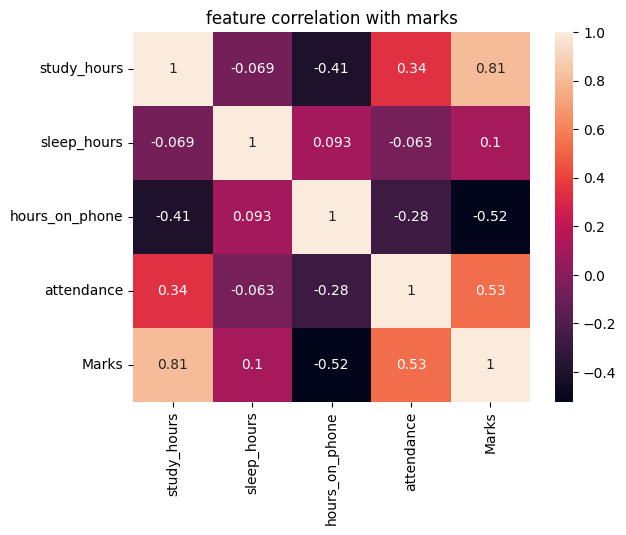

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix of the DataFrame
# Create a heatmap to visualize the correlations between features
# annot=True displays the correlation values on the heatmap
sns.heatmap(df.corr(), annot=True)
plt.title('Feature Correlation with Marks') # Set the title of the plot
plt.show() # Display the plot

# This heatmap shows the correlation between factors, ranging from -1 (strong negative) to 1 (strong positive).
# We can see relationships like hours_on_phone negatively affecting study_hours,
# and study_hours positively affecting Marks.

In [20]:
# Select features (input variables) and the target variable (output)
x = df[['study_hours','sleep_hours', 'hours_on_phone', 'attendance']]
y= df['Marks']

# Import the tool to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
# random_state ensures the split is the same each time for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model using the training data (features: x_train, target: y_train)
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# Import evaluation metrics: R2 score and Mean Squared Error
from sklearn.metrics import r2_score , mean_squared_error

# Make predictions on the test features (x_test) using the trained model
y_pred = model.predict(x_test)

# Calculate and print the Mean Squared Error (average of squared differences between actual and predicted)
print("Mean squares error :",mean_squared_error(y_test, y_pred))

# Calculate and print the R2 score (proportion of variance in target explained by the model)
print("R2 score :",r2_score(y_test, y_pred))

Mean squares error : 33.32357702906191
R2 score : 0.7944009452773937


In [23]:
model.predict([[6,7,2,90]])
# The model's prediction can exceed 100, which is unrealistic for marks.
# This is because linear regression is unbounded, though we could cap it with for instance numpy.

array([100.489739])

In [25]:
model.predict([[10,10,10,100]])

array([117.5441311])

In [24]:
model.predict([[2,3,1,98]])

array([76.32528788])

now it is time to mess around with the data

In [70]:
# Create a new feature 'study_quality' by dividing study hours by hours on phone.
# Note: This can result in infinite values if hours_on_phone is 0, which needs handling for some models.
df['study_quality']=df['study_hours']/(df['hours_on_phone']+0.01) # Added a small epsilon to avoid division by zero initially

In [71]:
# Select a different set of features including the new 'study_quality' column
f = df[['study_quality', 'hours_on_phone','sleep_hours','attendance']]
# Select the target variable
d = df['Marks']

# Split the data for the second model
f_train,f_test,d_train,d_test = train_test_split(f,d,test_size=0.2,random_state=21)

In [72]:
# Train a new Linear Regression model (model2) with the updated feature set
model2 = LinearRegression()
model2.fit(f_train,d_train)

LinearRegression()

In [73]:
from sklearn.metrics import r2_score , mean_squared_error

# Make predictions using model2
d_pred = model2.predict(f_test)

# Evaluate model2's performance
print("Mean squares error :",mean_squared_error(d_test, d_pred))
print("R2 score :",r2_score(d_test, d_pred))

Mean squares error : 104.21984439156702
R2 score : 0.4055775842095858


In [37]:
# Load a second student marks dataset
df2=pd.read_csv('student_marks.csv')
df2.head()

,study_hours,sleep_hours,hours_on_phone,attendance,Marks
0,4.4,8.8,1.2,92,87
1,9.6,7.9,4.2,60,96
2,7.6,8.7,2.6,78,91
3,6.4,8.5,3.5,61,99
4,2.4,7.0,5.5,85,88


In [38]:
k = df2[['study_hours', 'sleep_hours', 'hours_on_phone', 'attendance']]
l = df2['Marks']
k_train,k_test,l_train,l_test = train_test_split(k,l,test_size=0.2,random_state=21)

In [39]:
model3 =LinearRegression()
model3.fit(k_train,l_train)

LinearRegression()

In [40]:
l_pred = model3.predict(k_test)

print("Mean squares error :",mean_squared_error(l_test, l_pred))
print("R2 score :",r2_score(l_test, l_pred))

Mean squares error : 317.1479134904077
R2 score : -0.023685205417538935


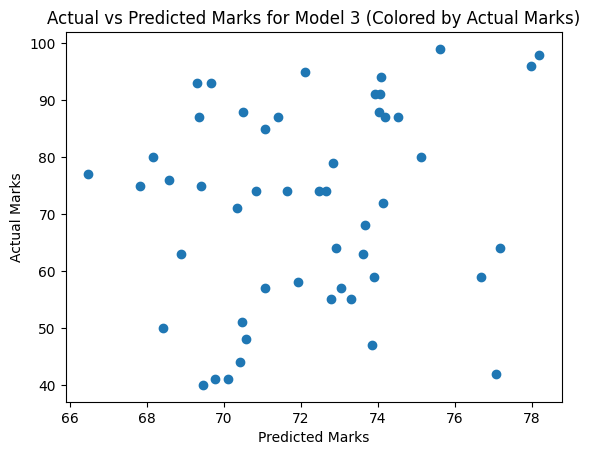

In [76]:
plt.scatter(model3.predict(k), l)
plt.xlabel('Predicted Marks')
plt.ylabel('Actual Marks')
plt.title('Actual vs Predicted Marks for Model 3 (Colored by Actual Marks)')
plt.show()

this shows the actual vs prediction mark, for instance lets take point (71,41) this means that the model predicted 71 while the actual value is 41

In [56]:
# Load the sales practice dataset
df3 = pd.read_csv('sales_practice_dataset.csv')
# Display the first few rows
df3.head()

,TV_Ads_k$,Online_Ads_k$,Radio_Ads_k$,Base_Price_$,Discount_%,Holiday_Flag,Competition_km,Store_Size,Month,Season,Units_Sold
0,24.08,20.00,6.74,15,23.7,0,1.23,1,5,2,136
1,32.34,20.48,0.04,15,10.3,1,4.36,2,8,3,240
2,10.61,15.66,8.33,20,7.5,0,1.72,2,2,1,193
3,18.37,21.46,11.83,15,8.1,0,2.63,2,8,3,189
4,23.99,12.63,7.57,5,15.7,0,1.94,1,4,2,160


In [57]:
# Display information about the sales dataset
display(df3.info())
# Display descriptive statistics for the sales dataset
display(df3.describe())
# Check for and display the count of missing values in the sales dataset
display(df3.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TV_Ads_k$       1000 non-null   float64
 1   Online_Ads_k$   1000 non-null   float64
 2   Radio_Ads_k$    1000 non-null   float64
 3   Base_Price_$    1000 non-null   int64  
 4   Discount_%      1000 non-null   float64
 5   Holiday_Flag    1000 non-null   int64  
 6   Competition_km  1000 non-null   float64
 7   Store_Size      1000 non-null   int64  
 8   Month           1000 non-null   int64  
 9   Season          1000 non-null   int64  
 10  Units_Sold      1000 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 86.1 KB


None

,TV_Ads_k$,Online_Ads_k$,Radio_Ads_k$,Base_Price_$,Discount_%,Holiday_Flag,Competition_km,Store_Size,Month,Season,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.704390,15.217170,7.966030,12.575000,10.205000,0.095000,2.051410,1.813000,6.314000,2.484000,236.226000
std,9.570128,6.106409,3.083592,5.520403,5.041715,0.293362,0.998431,0.768519,3.422443,1.108591,81.124177
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.300000,1.000000,1.000000,1.000000,40.000000
25%,18.132500,11.005000,5.870000,10.000000,6.775000,0.000000,1.330000,1.000000,3.000000,1.000000,176.750000
50%,24.480000,15.180000,8.005000,15.000000,10.100000,0.000000,2.030000,2.000000,6.000000,2.000000,231.000000
75%,31.255000,19.155000,9.985000,15.000000,13.725000,0.000000,2.732500,2.000000,9.000000,3.000000,287.000000
max,54.150000,33.020000,18.490000,20.000000,26.500000,1.000000,5.210000,3.000000,12.000000,4.000000,581.000000


,0
TV_Ads_k$,0
Online_Ads_k$,0
Radio_Ads_k$,0
Base_Price_$,0
Discount_%,0
Holiday_Flag,0
Competition_km,0
Store_Size,0
Month,0
Season,0


In [66]:
# Select features and target variable for the sales dataset
p = df3[['TV_Ads_k$','Online_Ads_k$','Radio_Ads_k$','Base_Price_$','Discount_%']]
o = df3['Units_Sold']

# Split the sales dataset into training and testing sets
p_train,p_test,o_train,o_test = train_test_split(p,o,test_size=0.2,random_state=21)

In [67]:
# Create and train a Linear Regression model on the sales dataset
model4 = LinearRegression()
model4.fit(p_train,o_train)

LinearRegression()

In [68]:
# Make predictions on the test set of the sales dataset
o_pred = model4.predict(p_test)

# Evaluate the model's performance on the sales dataset using MSE and R2 score
print("Mean squares error :",mean_squared_error(o_test, o_pred))
print("R2 score :",r2_score(o_test, o_pred))

Mean squares error : 3902.4915307330534
R2 score : 0.3271634741036312


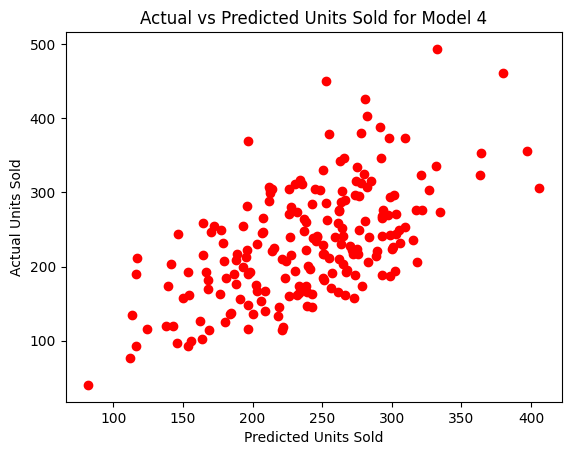

In [75]:
# Create a scatter plot to visualize actual vs. predicted units sold for model4 (trained on df3)
plt.scatter(o_pred, o_test, color='red') # Simple scatter plot with red points
plt.xlabel('Predicted Units Sold')
plt.ylabel('Actual Units Sold')
plt.title('Actual vs Predicted Units Sold for Model 4')
plt.show()